<a href="https://colab.research.google.com/github/ssuram/Machine-Learning/blob/main/Bank_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyforest


In [ ]:
import pyforest

In [ ]:
# reading the csv file 
churn_data = pd.read_csv('/content/Bank_churn_modelling.csv')
churn_data.shape

<IPython.core.display.Javascript object>

(10000, 14)

In [ ]:
churn_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn_data.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
# Summary Statistics
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# checking for the null values in data
churn_data.isna().apply(pd.value_counts).T

<IPython.core.display.Javascript object>

,False
RowNumber,10000
CustomerId,10000
Surname,10000
CreditScore,10000
Geography,10000
Gender,10000
Age,10000
Tenure,10000
Balance,10000
NumOfProducts,10000


In [ ]:
# checking the dtypes of the features
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Dropping features 
churn_data=churn_data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [ ]:
# checking for successful drop
churn_data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

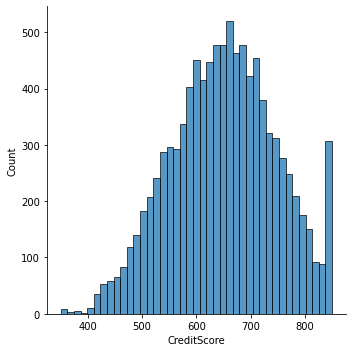

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

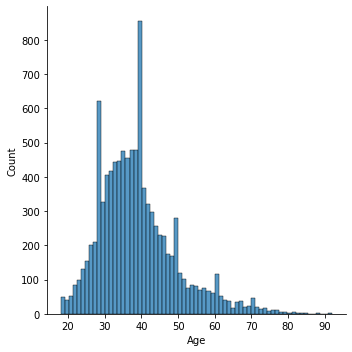

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

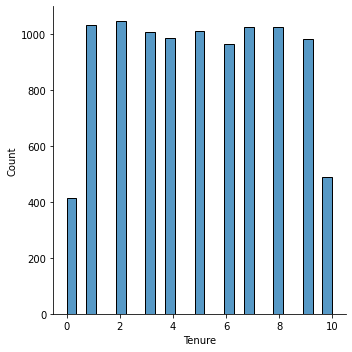

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

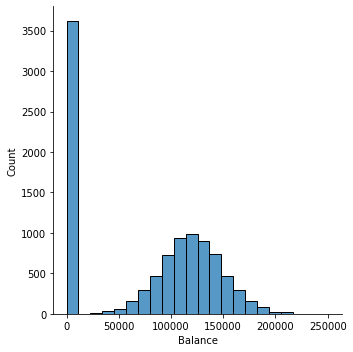

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

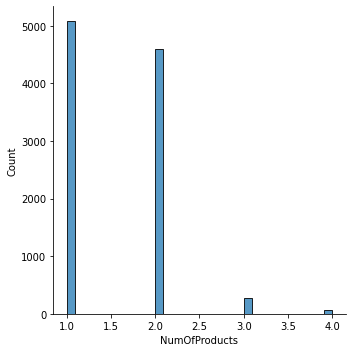

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

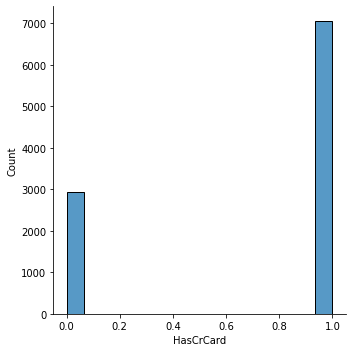

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

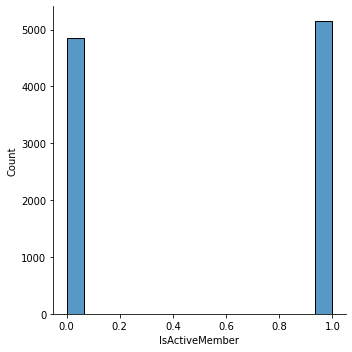

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

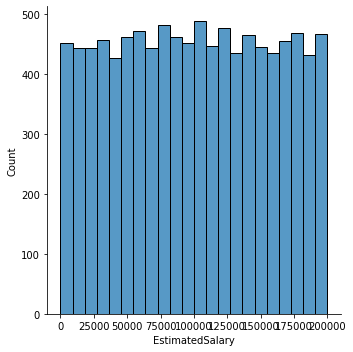

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

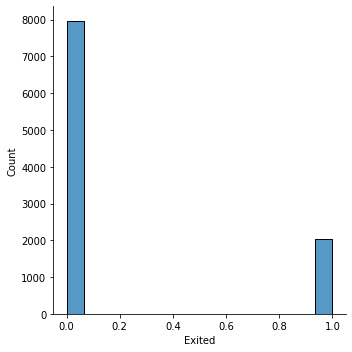

In [ ]:
# plotting distplot for various features
for i in churn_data.describe().columns:
  sns.displot(churn_data[i].dropna())
  plt.show()

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<IPython.core.display.Javascript object>

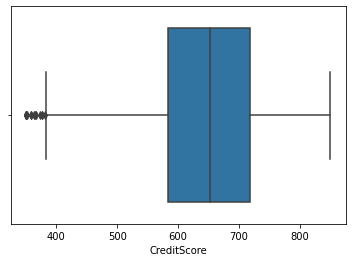

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<IPython.core.display.Javascript object>

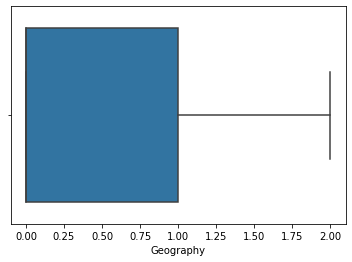

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<IPython.core.display.Javascript object>

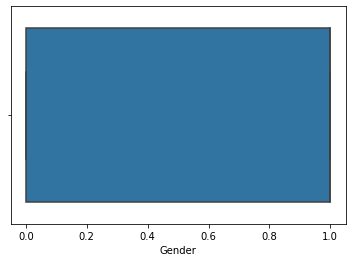

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<IPython.core.display.Javascript object>

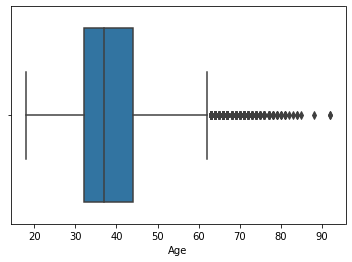

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<IPython.core.display.Javascript object>

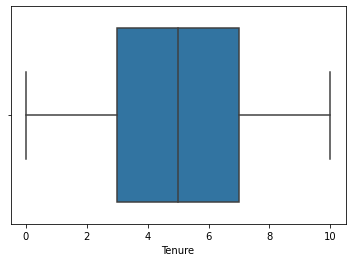

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<IPython.core.display.Javascript object>

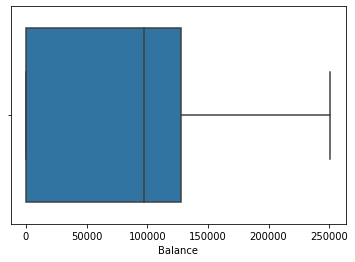

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<IPython.core.display.Javascript object>

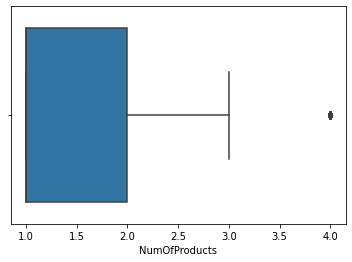

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<IPython.core.display.Javascript object>

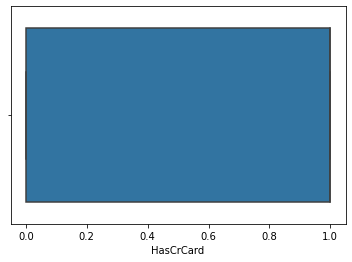

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<IPython.core.display.Javascript object>

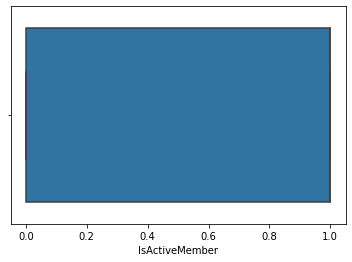

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<IPython.core.display.Javascript object>

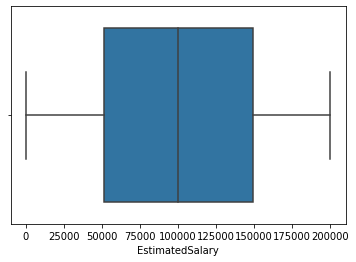

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<IPython.core.display.Javascript object>

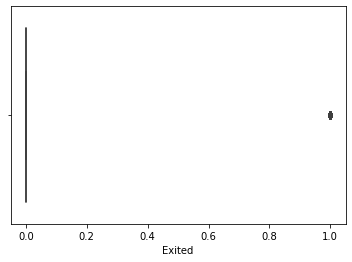

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<IPython.core.display.Javascript object>

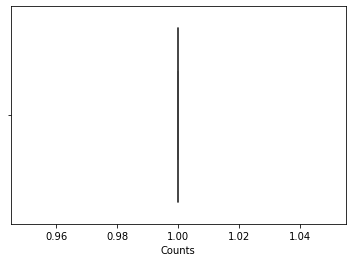

In [ ]:
# Plotting boxplot for various features
for j in churn_data.describe().columns:
  sns.boxplot(churn_data[j].dropna())
  plt.show()

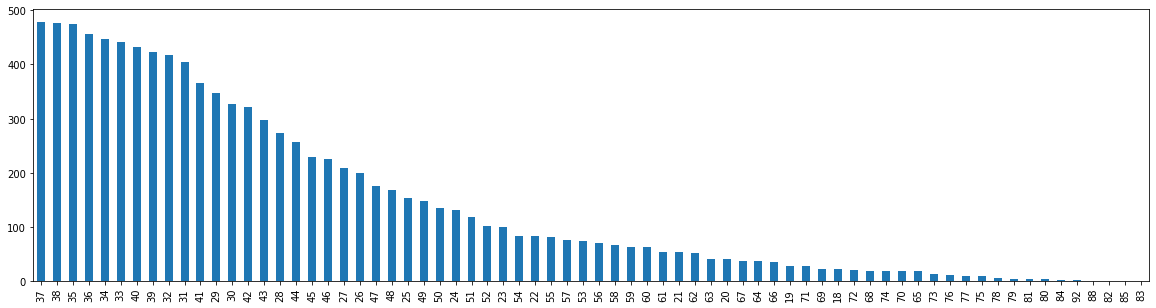

In [ ]:
# Plotting age feature
churn_data['Age'].value_counts().plot.bar(figsize = (20,5))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Proportion of Customer Churned')

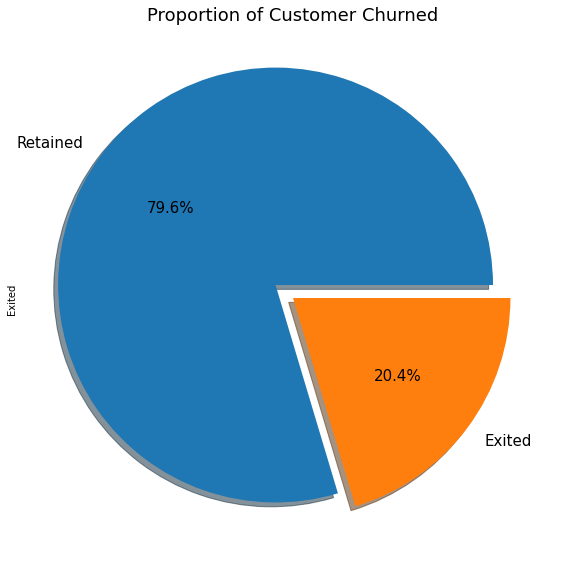

In [ ]:
# Plotting pie chart for the exited feature
plt.figure(figsize = (15,10))
labels = "Retained","Exited"
sizes = [churn_data.Exited[churn_data['Exited']==1].count(), churn_data.Exited[churn_data['Exited']==0].count()]
churn_data['Exited'].value_counts().plot.pie(explode=[0.1,0],autopct='%1.1f%%',shadow=True,textprops={'fontsize':15},labels = labels)
plt.title('Proportion of Customer Churned',fontsize = 18)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

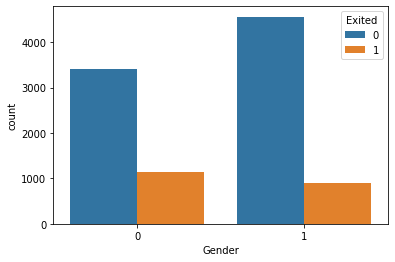

In [ ]:
# Plotting count plot for gender
plt.figue(figsize=(10,9))
sns.countplot(x='Gender',hue='Exited',data=churn_data)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

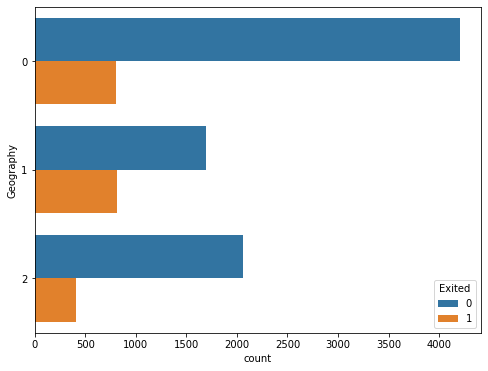

In [238]:
# plotting countplot for gender based on their nationality
male_count = churn_data[churn_data['Gender']=='Male']['Gender'].count()
female_count=churn_data[churn_data['Gender']=='Female']['Gender'].count()    
fig1 = plt.subplots(figsize=(8,6))
#print(male_count)
#print(female_count)
fig1= sns.countplot(hue='Exited',y='Geography',data=churn_data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

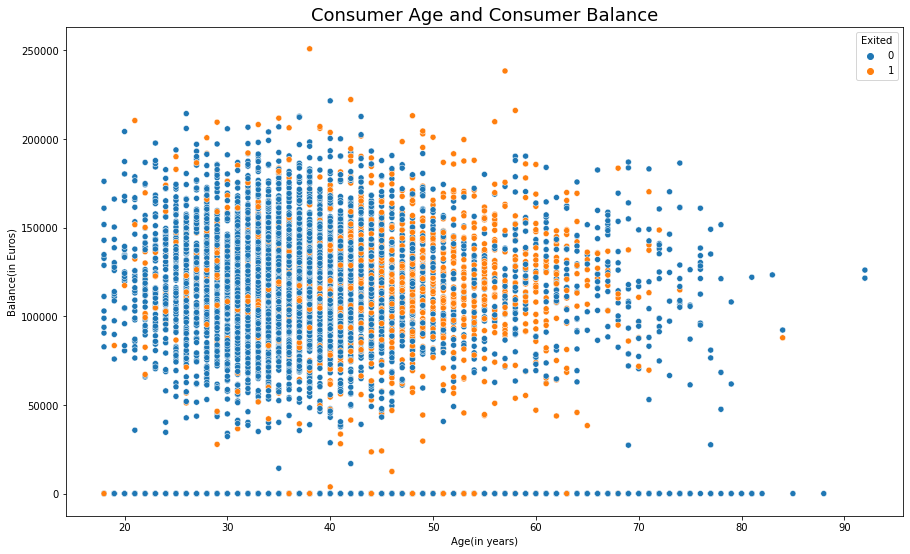

In [ ]:
# Scatter plot for Age vs Balance with respect to existed
plt.figure(figsize=(15,9))
plt.title('Consumer Age and Consumer Balance',fontsize=18)
plt.xlabel('Age(in years)')
plt.ylabel('Balance(in Euros)')
sns.scatterplot(x='Age',y='Balance',hue='Exited',data = churn_data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



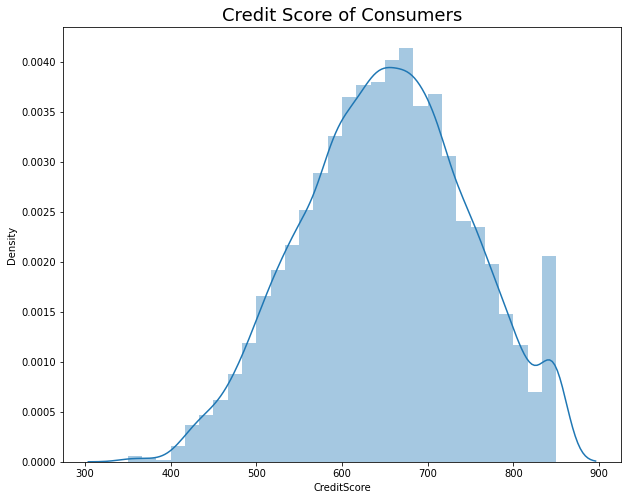

In [ ]:
# Cedit Score
plt.figure(figsize=(10,8))
plt.xlabel('Credit Score')
plt.title('Credit Score of Consumers',fontsize=18)
sns.distplot(churn_data['CreditScore'],bins=30)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

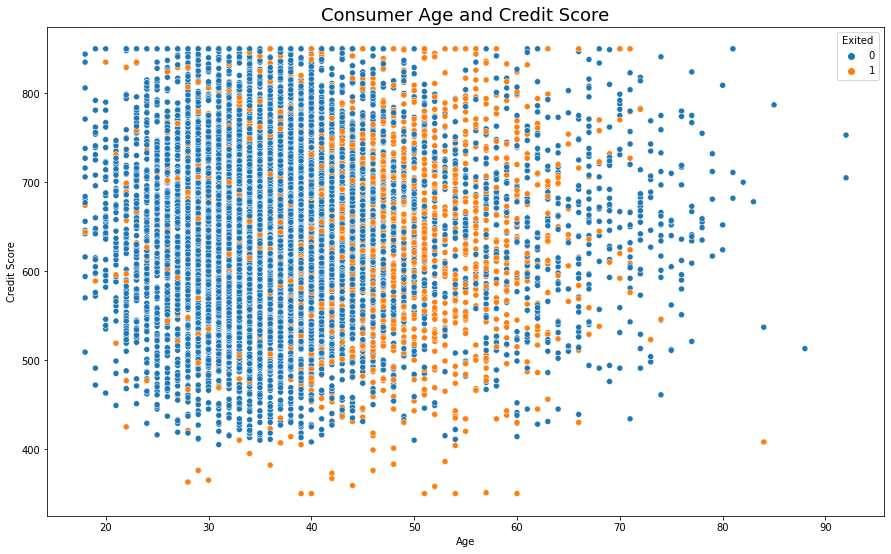

In [ ]:
# Scatterplot for Age vs Credit Score with respect to excited
plt.figure(figsize=(15,9))
plt.title('Consumer Age and Credit Score',fontsize=18)
plt.xlabel('Age')
plt.ylabel('Credit Score')
sns.scatterplot(x='Age',y='CreditScore',hue='Exited',data = churn_data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

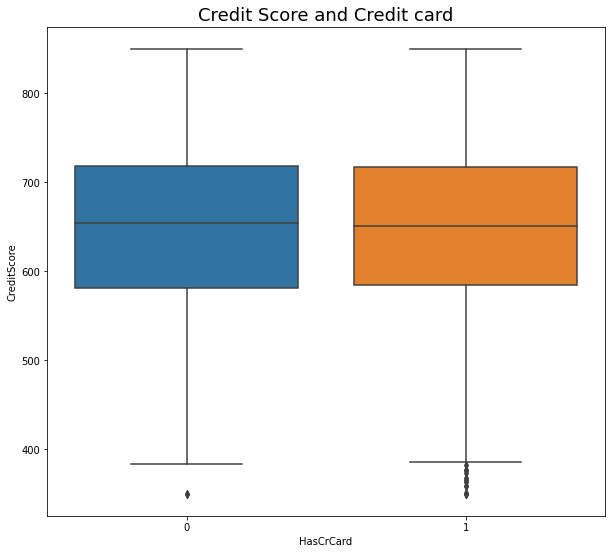

In [ ]:
# Plotting boxplot for Age and Credit Score
plt.figure(figsize=(10,9))
plt.title('Credit Score and Credit card',fontsize=18)
plt.xlabel('Credit Card')
plt.ylabel('Credit Score')
sns.boxplot(x ='HasCrCard',y='CreditScore',data=churn_data)
plt.show()

In [ ]:
# Geography Feature
churn_data[['Geography']].value_counts()


Geography
France       5014
Germany      2509
Spain        2477
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Proportion of Customer Churned')

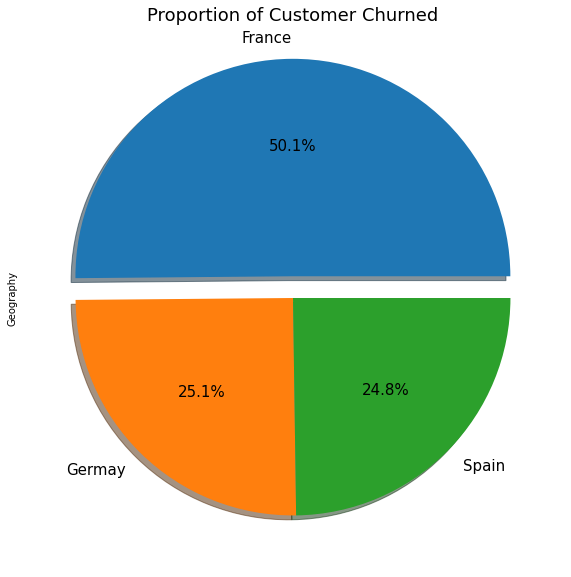

In [ ]:
# Plotting the pie plot 
labels = 'France','Germay','Spain'
plt.figure(figsize=(15,10))
sizes = [churn_data.Geography[churn_data['Geography']=='France'].count(),churn_data.Geography[churn_data['Geography']=='Spain'].count(),churn_data.Geography[churn_data['Geography']=='Germany']]
churn_data['Geography'].value_counts().plot.pie(explode=[0.1,0.0,0],autopct='%1.1f%%',shadow=True,textprops={'fontsize':15},labels = labels)
plt.title('Proportion of Customer Churned',fontsize = 18)


In [ ]:
# Gender Feature
churn_data['Counts']=1
churn_gender=churn_data.groupby('Gender')['Counts'].sum().reset_index()
fig1=px.pie(churn_gender,values='Counts',names='Gender',hole=0.4)
fig1.update_layout(title='Gender Proportion',title_x=0.48,annotations=[dict(text='Gender',font_size=15, showarrow=False,height=800,width=900)])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



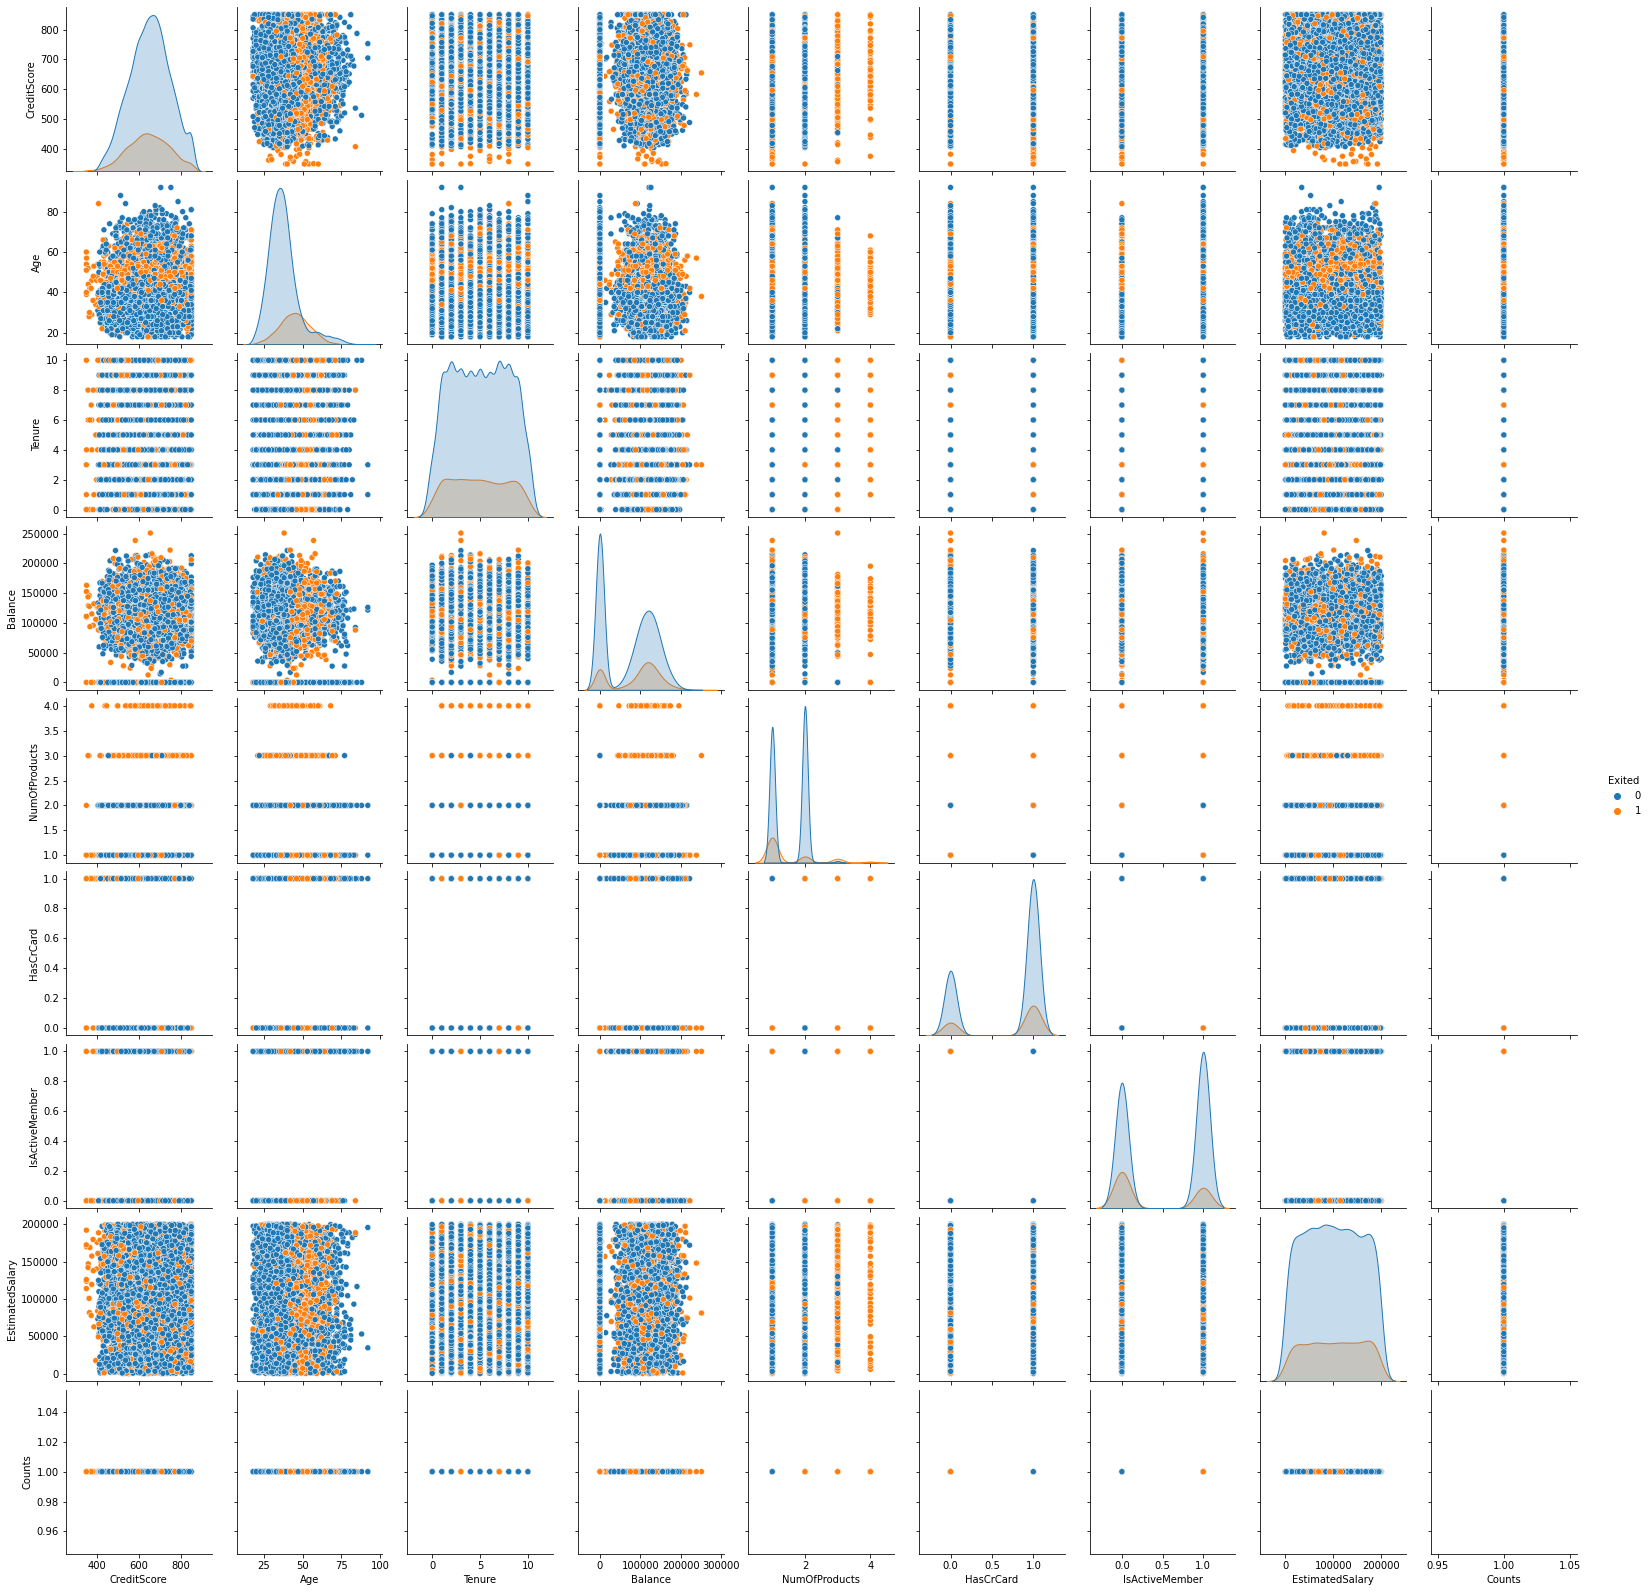

In [ ]:
# Pairplot with hue as Exited
sns.pairplot(hue='Exited',data = churn_data)

In [ ]:
# Label encoding 
encoder = LabelEncoder()

<IPython.core.display.Javascript object>

In [ ]:
# Checking the values in gender
churn_data[['Gender']].value_counts()

Gender
Male      5457
Female    4543
dtype: int64

In [ ]:
# Checking the values in Geography
churn_data[['Geography']].value_counts()

Geography
France       5014
Germany      2509
Spain        2477
dtype: int64

In [ ]:
# applying label encoding on gender and geography feature
churn_data['Geography']=encoder.fit_transform(churn_data['Geography'])
churn_data['Gender']= encoder.fit_transform(churn_data['Gender'])

In [ ]:
# checking if encoding was successful
churn_data[['Geography']].value_counts()

Geography
0            5014
1            2509
2            2477
dtype: int64

In [ ]:
# Correlation Matrix
churn_corr = churn_data.corr()
churn_corr

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Counts
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,NaN
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943,NaN
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,NaN
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,NaN
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,NaN
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,NaN
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,NaN
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,NaN
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,NaN
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,NaN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

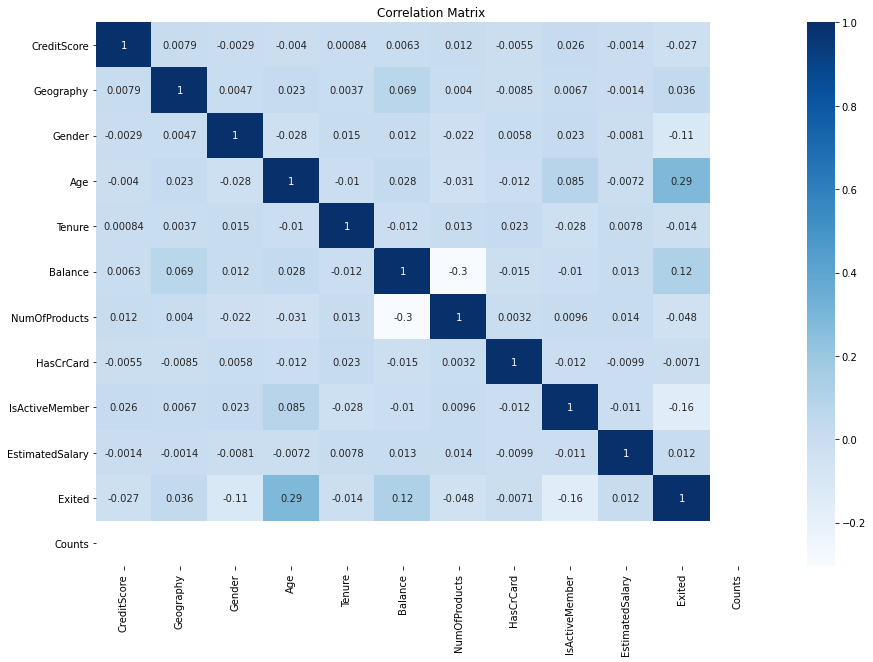

In [ ]:
# Heatmap for Correlation matrix
plt.figure(figsize = (15,10))
plt.title('Correlation Matrix')
sns.heatmap(churn_corr,annot=True,cmap='Blues')
plt.show()

In [ ]:
# For a better understanding for our target feature
churn_corr[['Exited']]*100

,Exited
CreditScore,-2.709354
Geography,3.594295
Gender,-10.651249
Age,28.532304
Tenure,-1.400061
Balance,11.853277
NumOfProducts,-4.781986
HasCrCard,-0.713777
IsActiveMember,-15.612828
EstimatedSalary,1.209686


Age feature has the highest correlation with target feature.

In [ ]:
# Defining the Independent features
features = ['Age','Balance','Geography','EstimatedSalary','Gender','Tenure','CreditScore','HasCrCard','NumOfProducts','IsActiveMember']

In [ ]:
# variable for Independent Feature
X = churn_data[features]

In [ ]:
# checking the features in X
X.head(5)

,Age,Balance,Geography,EstimatedSalary,Gender,Tenure,CreditScore,HasCrCard,NumOfProducts,IsActiveMember
0,42,0.00,0,101348.88,0,2,619,1,1,1
1,41,83807.86,2,112542.58,0,1,608,0,1,1
2,42,159660.80,0,113931.57,0,8,502,1,3,0
3,39,0.00,0,93826.63,0,1,699,0,2,0
4,43,125510.82,2,79084.10,0,2,850,1,1,1


In [ ]:
# Target Feature
Y = churn_data[['Exited']]

In [ ]:
# checking the Y
Y.head(5)

,Exited
0,1
1,0
2,1
3,0
4,0


All set now, we can deploying our models

In [147]:
# Spilitng the data into train and test 
train_X,val_X,train_Y,val_Y = train_test_split(X,Y,train_size = 0.8,random_state=42)

<IPython.core.display.Javascript object>

In [148]:
# lets check if data is split properly
train_X.shape

(8000, 10)

In [150]:
train_Y.shape

(8000, 1)

#Logistic Regression

In [151]:
churn_model = LogisticRegression()

<IPython.core.display.Javascript object>

In [152]:
# Fit the model
churn_model.fit(train_X,train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [205]:
# Now we check the predictions made by our model
LR_predictions = churn_model.predict(val_X)
LR_predictions

array([0, 0, 0, ..., 0, 0, 0])

#### Model Validation for Logistic Regression

In [243]:
# importing metrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error,confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve

In [206]:
# checking the accuracy using Mean Absolute error
LR_mae = mean_absolute_error(val_Y,LR_predictions)
LR_mae

0.1995

In [207]:
# Mean squared error
LR_mse=mean_squared_error(val_Y,LR_predictions)
LR_mse

0.1995

In [208]:
# accuracy score
LR_accuracy_score= accuracy_score(val_Y,LR_predictions)
LR_accuracy_score*100

80.05

In [209]:
# Confusion Matrix
LR_cf = confusion_matrix(val_Y,LR_predictions)
LR_cf

array([[1573,   34],
       [ 365,   28]])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

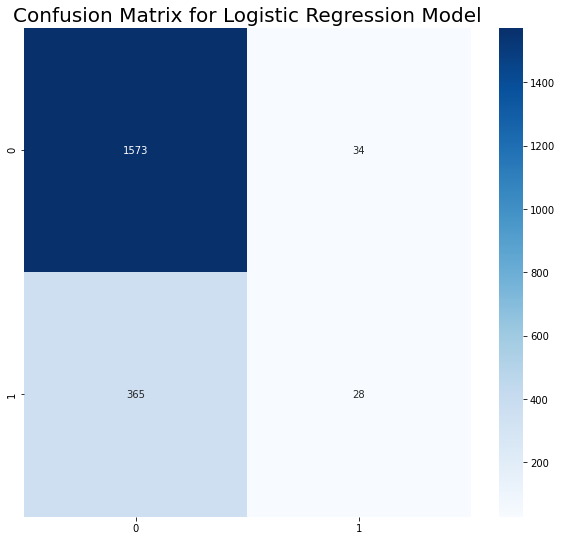

In [210]:
# Confusion matrix heatmap
plt.figure(figsize = (10,9))
plt.title('Confusion Matrix for Logistic Regression Model',fontsize = 20)
sns.heatmap(LR_cf,cmap = 'Blues',annot = True, fmt = 'g')
plt.show()

In [211]:
# Printing the classification report
LR_classification = classification_report(val_Y,LR_predictions)
print(LR_classification)

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



In [246]:
# ROC curve
LR_roc = roc_curve(val_Y,LR_predictions)
LR_roc

(array([0.        , 0.02115744, 1.        ]),
 array([0.        , 0.07124682, 1.        ]),
 array([2, 1, 0]))

In [248]:
# ROC auc score
LR_roc_auc = roc_auc_score(val_Y,LR_predictions)
LR_roc_auc*100

52.50446915609349

In [279]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(val_Y,LR_predictions)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

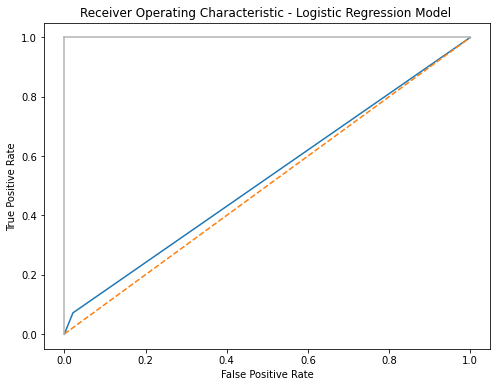

In [280]:
# Plotting roc curve for Logistic Regression model
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - Logistic Regression Model ')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#KNN Model

In [162]:
from sklearn.neighbors import KNeighborsClassifier

In [186]:
KNN_model = KNeighborsClassifier(n_neighbors=3)

In [190]:
KNN_model.fit(train_X,train_Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [204]:
# Checking for KNN model predictions
KNN_predictions= KNN_model.predict(val_X)
KNN_predictions

array([0, 0, 0, ..., 0, 0, 0])

####Model validation for KNeighbors Classifer

In [212]:
# Mean absolute error
KNN_mae = mean_absolute_error(val_Y,KNN_predictions)
KNN_mae*100

26.1

In [213]:
# Checking accuracy score
KNN_accuracy_score= accuracy_score(val_Y,KNN_predictions)
KNN_accuracy_score*100

73.9

In [214]:
# Confusion Matrix
KNN_cf = confusion_matrix(val_Y,KNN_predictions)
KNN_cf

array([[1426,  181],
       [ 341,   52]])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

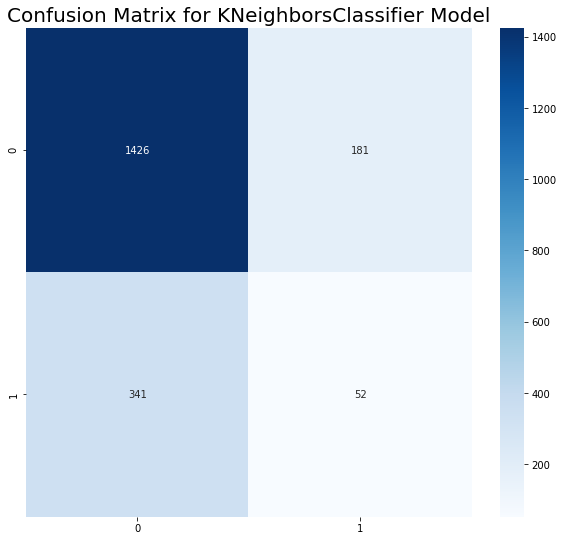

In [215]:
# Confusion matrix heatmap
plt.figure(figsize = (10,9))
plt.title('Confusion Matrix for KNeighborsClassifier Model',fontsize = 20)
sns.heatmap(KNN_cf,cmap = 'Blues',annot = True, fmt = 'g')
plt.show()

In [216]:
# Printing the classification report
KNN_classification = classification_report(val_Y,KNN_predictions)
print(KNN_classification)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1607
           1       0.22      0.13      0.17       393

    accuracy                           0.74      2000
   macro avg       0.52      0.51      0.51      2000
weighted avg       0.69      0.74      0.71      2000



In [252]:
# ROC curve for KNN
KNN_roc = roc_curve(val_Y,KNN_predictions)
KNN_roc

(array([0.        , 0.11263223, 1.        ]),
 array([0.        , 0.13231552, 1.        ]),
 array([2, 1, 0]))

In [253]:
# ROC auc score for KNN
KNN_roc_auc = roc_auc_score(val_Y,KNN_predictions)
KNN_roc_auc*100

50.98416438260727

In [277]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(val_Y,KNN_predictions)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

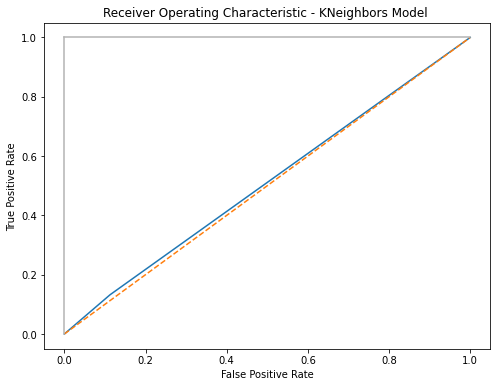

In [278]:
# Plotting roc curve for KNN model
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - KNeighbors Model ')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Suppport Vector Machines

In [227]:
from sklearn.svm import SVC as svc
svc_model = svc(kernel='rbf', degree=8)


In [228]:
# Fit the model
svc_model.fit(train_X,train_Y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [230]:
# Model predictions
SVC_predictions = svc_model.predict(val_X)
SVC_predictions

array([0, 0, 0, ..., 0, 0, 0])

####Model validations for SVM

In [231]:
#Checking MSE
SVC_mae = mean_absolute_error(val_Y,SVC_predictions)
SVC_mae


0.1965

In [233]:
# Checking accurcy score
SVC_accuracy = accuracy_score(val_Y,SVC_predictions)
SVC_accuracy*100

80.35

In [234]:
# Classification 
SVC_classification = classification_report(val_Y,SVC_predictions)
print(SVC_classification)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [235]:
# Confusion Matrix 
SVC_cf = confusion_matrix(val_Y,SVC_predictions)
SVC_cf

array([[1607,    0],
       [ 393,    0]])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

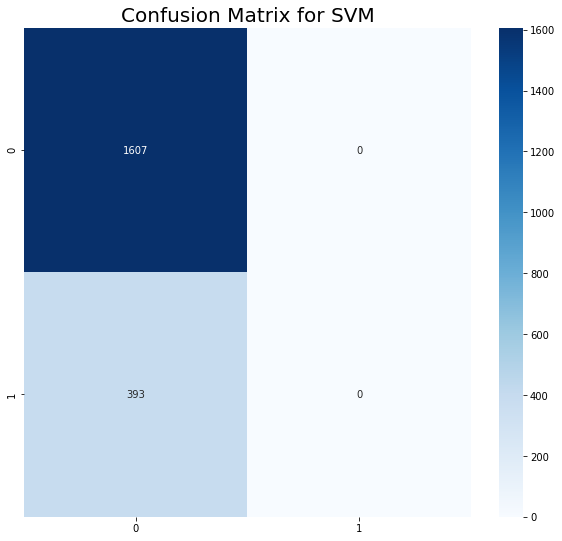

In [236]:
# Confusion matrix heatmap
plt.figure(figsize = (10,9))
plt.title('Confusion Matrix for SVM',fontsize = 20)
sns.heatmap(SVC_cf,cmap = 'Blues',annot = True, fmt = 'g')
plt.show()

In [251]:
# ROC curve for SVC
SVC_roc = roc_curve(val_Y,SVC_predictions)
SVC_roc

(array([0., 1.]), array([0., 1.]), array([1, 0]))

In [254]:
# ROC auc score for SVC
SVC_roc_auc = roc_auc_score(val_Y,SVC_predictions)
SVC_roc_auc*100

50.0

In [275]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(val_Y,SVC_predictions)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

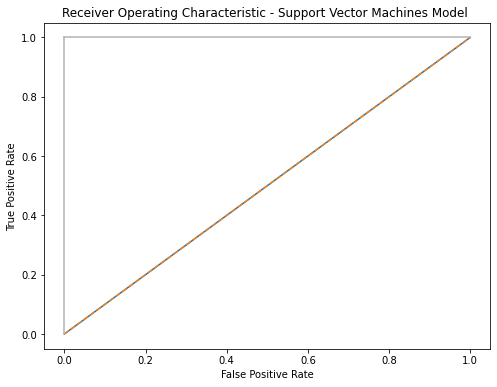

In [276]:
# Plotting roc curve for SVM model
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - Support Vector Machines Model ')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Decision Tree Classifier

In [200]:
# importing decision trees model from sklearn
from sklearn.tree import DecisionTreeRegressor
DF_model = DecisionTreeRegressor(random_state=1)


In [202]:
# Fit the model
DF_model.fit(train_X,train_Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [203]:
# Model predictions
DF_predictions = DF_model.predict(val_X)
DF_predictions

array([1., 0., 0., ..., 1., 0., 0.])

####Model validation for Decision Tree Regressor

In [218]:
# Checking the mean absolute error
DF_mae = mean_absolute_error(val_Y,DF_predictions)
DF_mae

0.217

In [220]:
# Checking accuracy score
DF_accuracy = accuracy_score(val_Y,DF_predictions)
DF_accuracy*100

78.3

In [222]:
# checking the classification report
DF_classification = classification_report(val_Y,DF_predictions)
print(DF_classification)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.52      0.48       393

    accuracy                           0.78      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.79      0.78      0.79      2000



In [223]:
# Confusion Matrix 
DF_cf = confusion_matrix(val_Y,DF_predictions)
DF_cf

array([[1362,  245],
       [ 189,  204]])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

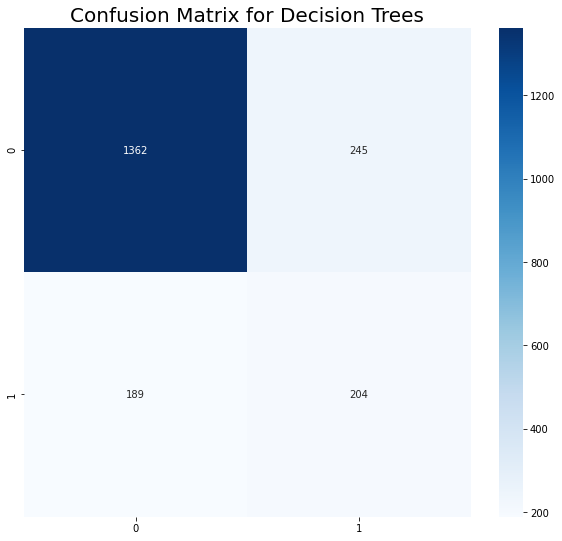

In [224]:
# Heatmap for confusion Matrix
plt.figure(figsize = (10,9))
plt.title('Confusion Matrix for Decision Trees',fontsize = 20)
sns.heatmap(DF_cf,cmap = 'Blues',annot = True, fmt = 'g')
plt.show()

In [250]:
# ROC curve for Decision Trees
DF_roc = roc_curve(val_Y,DF_predictions)
DF_roc

(array([0.      , 0.152458, 1.      ]),
 array([0.        , 0.51908397, 1.        ]),
 array([2., 1., 0.]))

In [255]:
# ROC auc score for Decision Trees
DF_roc_auc = roc_auc_score(val_Y,DF_predictions)
DF_roc_auc*100

68.3312986599657

In [273]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(val_Y,DF_predictions)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

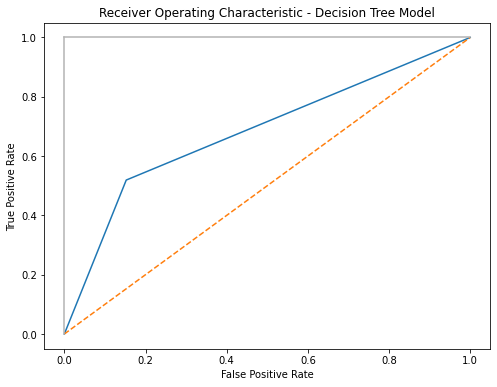

In [274]:
# Plotting roc curve for Decision Tree model
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - Decision Tree Model')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Random Forest Classifer

In [191]:
RF_model = RandomForestClassifier(n_estimators=200,random_state=1)

<IPython.core.display.Javascript object>

In [192]:
RF_model.fit(train_X,train_Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [193]:
RF_predictions = RF_model.predict(val_X)

####Model validation for Random Forest Classifer

In [194]:
# Checking mean absolute error for random forest
RF_mae = mean_absolute_error(val_Y,RF_predictions)
RF_mae

0.1325

In [195]:
# Checking accuracy score for random forest 
RF_accuracy = accuracy_score(val_Y,RF_predictions)
RF_accuracy*100

86.75

In [240]:
# Confusion Matrix for Random Forest Model
RF_cf = confusion_matrix(val_Y,RF_predictions)
RF_cf

array([[1550,   57],
       [ 208,  185]])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

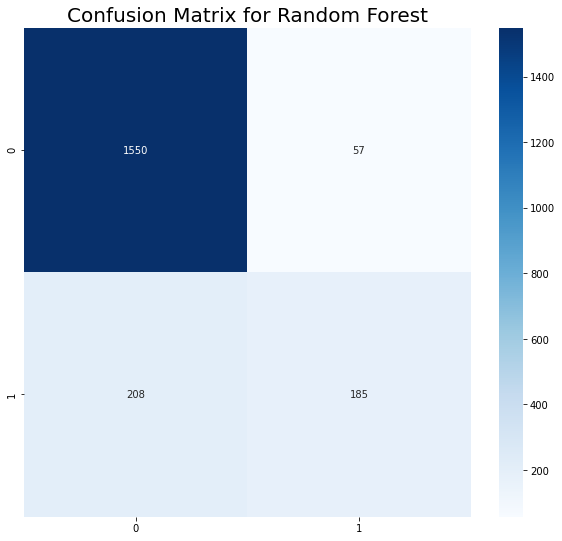

In [241]:
# heatmap for Confusion Matrix
plt.figure(figsize = (10,9))
plt.title('Confusion Matrix for Random Forest',fontsize = 20)
sns.heatmap(RF_cf,cmap = 'Blues',annot = True, fmt = 'g')
plt.show()

In [242]:
# classification report 
RF_classification = classification_report(val_Y,RF_predictions)
print(RF_classification)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [249]:
# ROC curve for Random Forest
RF_roc = roc_curve(val_Y,RF_predictions)
RF_roc

(array([0.        , 0.03546982, 1.        ]),
 array([0.        , 0.47073791, 1.        ]),
 array([2, 1, 0]))

In [256]:
# ROC auc score for Random Forest
RF_roc_auc = roc_auc_score(val_Y,RF_predictions)
RF_roc_auc*100

71.76340469732452

In [257]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(val_Y,RF_predictions)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

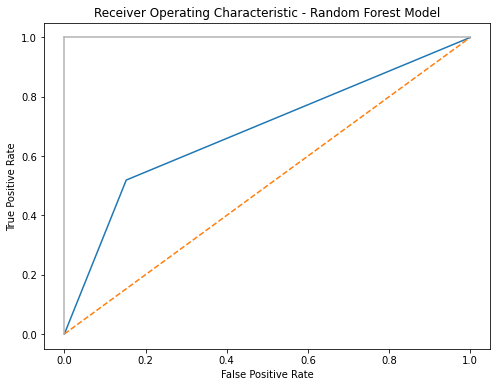

In [263]:
# Plotting roc curve for Random forest model
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - Random Forest Model')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()